/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6209 - loss: 0.7582 - val_accuracy: 0.6250 - val_loss: 0.8938
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7794 - loss: 0.5410 - val_accuracy: 0.6250 - val_loss: 0.5654
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8444 - loss: 0.3265 - val_accuracy: 0.8125 - val_loss: 0.4569
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9257 - loss: 0.3481 - val_accuracy: 0.9375 - val_loss: 0.3648
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9496 - loss: 0.2845 - val_accuracy: 0.6875 - val_loss: 0.4381
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9138 - loss: 0.2787 - val_accuracy: 0.8750 - val_loss: 0.3544
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9720 - loss: 0.2198 - val_accuracy: 0.8750 - val_loss: 0.3288
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9537 - loss: 0.2063 - val_accuracy: 0.9375 - val_loss: 0.2995


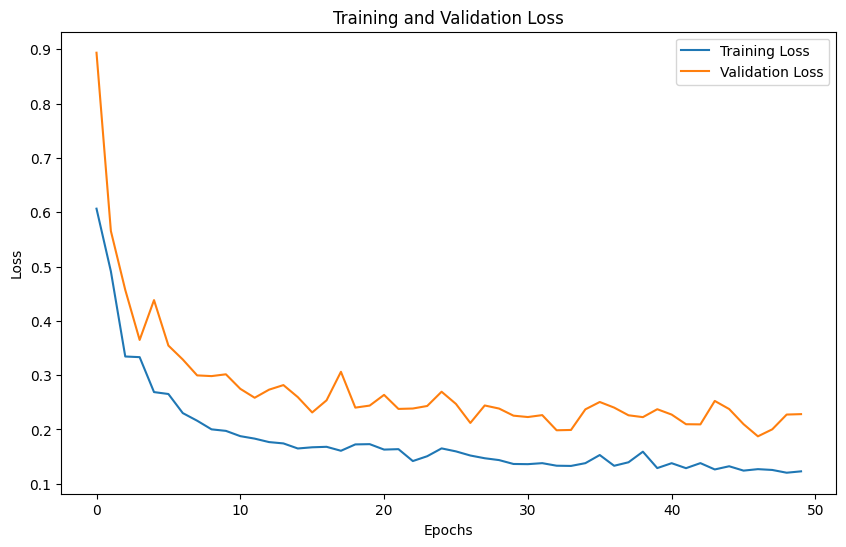

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

class FacultyData:
    def __init__(self, num_samples=100):
        self.num_samples = num_samples
        self.df = self.generate_data()

    def generate_data(self):
        data = []
        for _ in range(self.num_samples):
            experience = random.randint(1, 35)
            age = experience + random.randint(25, 30)

            if experience < 10:
                designation = "Asst"
                factor = 3
            elif 10 <= experience < 20:
                designation = "Asso"
                factor = 2
            else:
                designation = "Prof"
                factor = 1

            publications = max(0, experience * 2 + np.random.randint(-2, 3))
            patents = max(0, publications // 3 + np.random.randint(-1, 2))

            data.append([experience, age, designation, factor, publications, patents])

        df = pd.DataFrame(data, columns=["Experience", "Age", "Designation", "Designation_Factor", "Publications", "Patents"])
        return df


faculty_data = FacultyData(num_samples=100)
df = faculty_data.df


label_encoder = LabelEncoder()
df['Designation_Encoded'] = label_encoder.fit_transform(df['Designation'])


X = df[['Age', 'Publications', 'Patents']]
y = df['Designation_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of ANN: {accuracy * 100:.2f}%")


random_indices = np.random.choice(range(len(X_test)), size=5, replace=False)
print("\nPredictions for Faculty Designation (Random 5 Samples):")
for i in random_indices:
    print(f"Faculty with Age={X_test.iloc[i]['Age']}, Publications={X_test.iloc[i]['Publications']}, Patents={X_test.iloc[i]['Patents']}:")
    print(f"  Actual Designation: {y_test_labels[i]}")
    print(f"  Predicted Designation: {y_pred_labels[i]}")
    print("-" * 50)


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
